In [53]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [54]:
%cd '/content/drive/MyDrive/Driver Assistant Application(CodeFlex) 🚗 🚏👨🏻‍💻/Driver Vision monitoring and validation/Eye'

/content/drive/MyDrive/Driver Assistant Application(CodeFlex) 🚗 🚏👨🏻‍💻/Driver Vision monitoring and validation/Eye


In [55]:
size=224

In [56]:
train_path = '/content/drive/MyDrive/Driver Assistant Application(CodeFlex) 🚗 🚏👨🏻‍💻/Driver Vision monitoring and validation/Eye'
valid_path = '/content/drive/MyDrive/Driver Assistant Application(CodeFlex) 🚗 🚏👨🏻‍💻/Driver Vision monitoring and validation/Eye'

In [57]:
#import os
#from PIL import Image
#import matplotlib.pyplot as plt

#main_folder_path = '/content/drive/MyDrive/AI base Alzheimer s care and Cognitive Support Mobile App  /Ashen Doc'

#subfolders = [f for f in os.listdir(main_folder_path) if os.path.isdir(os.path.join(main_folder_path, f))]

#for folder in subfolders:
#    folder_path = os.path.join(main_folder_path, folder)
#
 #   image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('jpg', 'jpeg', 'png', 'gif', 'bmp'))]
#
 #   for image_file in image_files:
  #      image_path = os.path.join(folder_path, image_file)
#
 #       image = Image.open(image_path)
  #      plt.imshow(image)
   #     plt.title(image_file)
    #    plt.axis('off')
     #   plt.show()

In [58]:
inception = InceptionV3(input_shape=[size,size] + [3], weights='imagenet', include_top=False)

In [59]:
for layer in inception.layers:
    layer.trainable = False

In [60]:
folders = glob(train_path+'/*')

In [61]:
x = Flatten()(inception.output)

In [62]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

In [63]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_188 (Conv2D)       │ (None, 111, 111, 32)   │            864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_188   │ (None, 111, 111, 32)   │             96 │ conv2d_188[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_188            │ (None, 111, 111, 32)   │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_189 (Conv2D)       │ (None, 109, 109, 32)   │          9,216 │ activation_188[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_189   │ (None, 109, 109, 32)   │             96 │ conv2d_189[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_189            │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_190 (Conv2D)       │ (None, 109, 109, 64)   │         18,432 │ activation_189[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_190   │ (None, 109, 109, 64)   │            192 │ conv2d_190[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_190            │ (None, 109, 109, 64)   │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_8           │ (None, 54, 54, 64)     │              0 │ activation_190[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_191 (Conv2D)       │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_191   │ (None, 54, 54, 80)     │            240 │ conv2d_191[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_191            │ (None, 54, 54, 80)     │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_192 (Conv2D)  

 Total params: 21,956,387 (83.76 MB)

 Trainable params: 153,603 (600.01 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [64]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [65]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [66]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (size, size),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 137 images belonging to 3 classes.


In [67]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (size, size),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 137 images belonging to 3 classes.


In [68]:
steps_per_epoch = len(training_set)
validation_steps = len(test_set)

In [69]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=min(len(training_set), 5),
  validation_steps=min(len(test_set), 5)
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 61s 10s/step - accuracy: 0.5547 - loss: 4.1855 - val_accuracy: 0.7664 - val_loss: 1.8064
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 69s 8s/step - accuracy: 0.8188 - loss: 0.8263 - val_accuracy: 0.8686 - val_loss: 0.7763
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 39s 8s/step - accuracy: 0.8462 - loss: 1.1180 - val_accuracy: 0.9562 - val_loss: 0.3145
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 43s 8s/step - accuracy: 0.9460 - loss: 0.4036 - val_accuracy: 0.9927 - val_loss: 0.0265
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 37s 8s/step - accuracy: 0.9352 - loss: 0.3852 - val_accuracy: 0.9708 - val_loss: 0.0811
Epoch 10/10
5/5

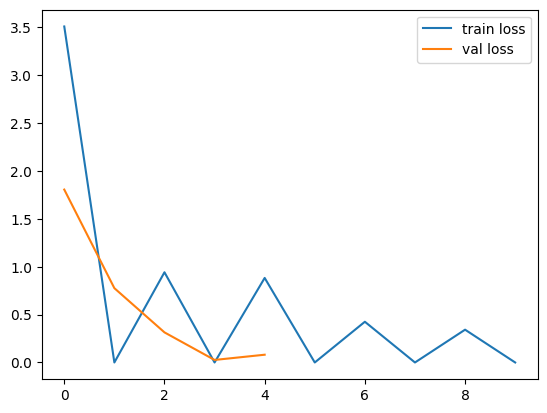

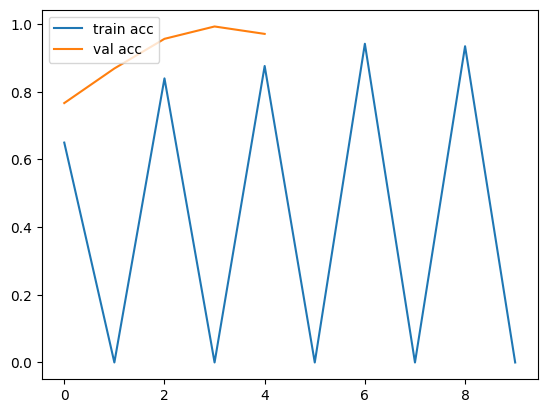

<Figure size 640x480 with 0 Axes>

In [70]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [71]:
from tensorflow.keras.models import load_model

model.save('sample_model.h5')

In [72]:
y_pred = model.predict(test_set)

4/5 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 24s 4s/step


In [73]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [74]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [75]:
from tensorflow.keras.models import load_model

model=load_model('sample_model.h5')

In [76]:
img=image.load_img('/content/drive/MyDrive/Driver Assistant Application(CodeFlex) 🚗 🚏👨🏻‍💻/Driver Vision monitoring and validation/Eye/closeEye/s0001_00141_0_0_0_0_0_01.png',target_size=(size,size))

In [77]:
x=image.img_to_array(img)
x=x/255

In [78]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [79]:
model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


array([[0.00220821, 0.9874199 , 0.01037191]], dtype=float32)

In [81]:
np.argmax(model.predict(img_data), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


array([1])

In [82]:
class_map = training_set.class_indices
classes = []
for key in class_map.keys():
    classes.append(key)

In [83]:
classes

['Half open eye', 'closeEye', 'openEye']

In [84]:
def predict_image(filename, model):
    img_ = image.load_img(filename, target_size=(224, 224))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.

    prediction = model.predict(img_processed)
    prob = prediction
    print(prob[0])

    index = np.argmax(prediction)
    confidence = prob[0][index]

    if confidence >= 0.9:
        plt.title("Prediction - {}".format(str(classes[index]).title()), size=18, color='green')
        plt.imshow(img_array)
    else:
        plt.title("Not Detected", size=18, color='red')
        plt.imshow(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
[9.9999356e-01 6.4720116e-06 6.4787155e-18]


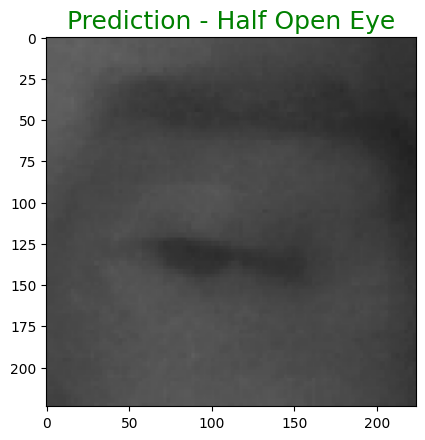

In [85]:
predict_image('/content/drive/MyDrive/Driver Assistant Application(CodeFlex) 🚗 🚏👨🏻‍💻/Driver Vision monitoring and validation/Eye/Half open eye/s0001_02408_0_0_1_0_0_01.png', model)

Saving s0001_02421_0_0_1_0_0_01.png to s0001_02421_0_0_1_0_0_01 (1).png
File uploaded: s0001_02421_0_0_1_0_0_01 (1).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
[9.8524600e-01 1.4754024e-02 2.3602488e-14]


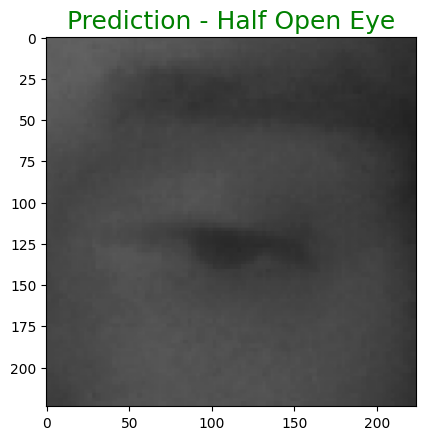

In [87]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
    print(f'File uploaded: {filename}')
    predict_image(filename, model)